# Etude du « match » à partir de rendez-vous de types « speed dating »


## I] Préliminaires : Mise en forme des données

##### (i) Présentation générale de la base

Afin de mener à bien ce projet, nous avons utilisé une base de données disponible sur Kaggle. Cette base fut réalisée par Ray Fisham et Sheena Lyengar, professeurs à Columbia Business School, dans le cadre de la rédaction d’un rapport intitulé «Gender Differences in Mate Selection : Evidence From a Speed Dating Experiment».

La base initiale contient 8377 observations et 195 variables. La base de travail, obtenue après divers traitements, contient 4183 observations et 92 variables.

Les données ayant servies à l’élaboration de la base proviennent de sessions expérimentales de « speed dating » (méthode de recherche d'un partenaire en vue d'une liaison sentimentale ou matrimoniale qui consiste en une série d'entretiens courts avec différents partenaires potentiels). Ces sessions de speed dating ont eu lieu entre 2002 et 2004. 

Les personnes ayant accepté de participer à cette expérience devaient remplir un questionnaire avant le premier entretien afin de renseigner leurs goûts et l'importance de certaines caractéristiques chez les personnes qu'elles rencontraient.
Une fois la rencontre effectuée, les deux participants devaient alors se noter mutuellement sur des critères définis ci-dessous. Ils avaient enfin à choisir s'ils souhaitaient aller plus loin ou non. Un "match" correspond à la situation où les deux personnes qui se sont rencontrées souhaitent continuer.

##### (ii) Variables utilisées dans ce projet


Les sessions de speed dating, étalées entre octobre 2002 et avril 2004, sont réparties en « wave ». Cela signifie que l’expérimentation a eu lieu à des dates différentes, et par petits groupes de 20 à 30 participants. Par exemple, la première wave date du 16 octobre 2002, et réunit 10 Hommes et 10 Femmes. La seconde a eu lieu le 23 octobre 2002 et réunit 16 Hommes et 19 Femmes.


Nous allons maintenant nous attacher à décrire les variables principales du modèle, ou du moins celles que nous utiliserons par la suite.

- **Variables générales** : Il s'agit de variables clés permettant d'identifier un individu

| Nom         | Signification de la variable                      |
| :---        | :---                                             | 
| iid         | Identifiant unique pour chaque participant       |
| pid         | Identifiant du partenaire le soir de l'événement | 
| gender      | Genre                                            | 
| wave        | Numéro de la vague de rencontres                 | 
| match       | Vaut 1 en cas de match, 0 sinon                  | 



- **Variables d'intérêt** : Les personnes devaient répondre à la question suivante : "How interested are you in the following activities, on a scale of 1-10?"


| Nom         | Signification de la variable   |
| :---        | :---                           | 
| sports      | Playing sports/athletics       | 
| tvsports    | Watching sports                | 
| exercise    | Body building/exercising       | 
| dining      | Dining out                     | 
| museums     | Museums/galleries              | 
| art         | Art                            | 
| hiking      | Hiking/camping                 | 
| gaming      | Gaming                         | 
| clubbing    | Dancing/clubbing               | 
| reading     | Reading                        | 
| tv          | Watching TV                    | 
| theater     | Theater                        | 
| movies      | Movies                         | 
| concerts    | Going to concerts              | 
| music       | Music                          | 
| shopping    | Shopping                       | 
| yoga        | Yoga/meditation                | 


- **Variables sociales et religieuses** :

| Nom         | Signification de la variable                                          |
| :---        | :---                                                                  | 
| samerace    | participant and the partner were the same race. 1= yes, 0=no          | 
| age_o       | age of partner                                                        | 
| race_o      | race of partner                                                       | 
| age         | age                                                                   | 
| field_cd    | age of partner                                                        | 
| race        | race                                                                  | 
| imprace     | How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background? |
| imprelig    |  How important is it to you (on a scale of 1-10) that a person you date be of the same religious background? |
| goal        | What is your primary goal in participating in this event? Seemed like a fun night out=1 To meet new people=2 To get a date=3 Looking for a serious relationship=4 To say I did it=5 Other=6 |
| date        | In general, how frequently do you go on dates? Several times a week=1 Twice a week=2 Once a week=3 Twice a month=4 Once a month=5 |
| go_out      | How often do you go out (not necessarily on dates)? Several times a week=1 Twice a week=2 Once a week=3 Twice a month=4 Once a month=5 Several times a year=6 Almost never=7 |
| exphappy    | Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?  |

- **Variables de goût**
      * Please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important)

| Nom         | Signification de la variable |
| :---        | :---                         | 
| attr1_1     | Attractive                   | 
| sinc1_1     | Sincere                      | 
| intel1_1    | Intelligent                  | 
| fun1_1      | Fun                          | 
| amb1_1      | Ambitious                    | 
| shar1_1     | Has shared interests/hobbies | 

     * How do you think you measure up? Please rate your opinion of your own attributes, on a scale of 1-10 (be honest!):
 
| Nom         | Signification de la variable |
| :---        | :---                         | 
| attr3_1     | Attractive                   | 
| sinc3_1     | Sincere                      | 
| intel3_1    | Intelligent                  | 
| fun3_1      | Fun                          | 
| amb3_1      | Ambitious                    | 
| shar3_1     | Has shared interests/hobbies | 

     * Answer the remaining questions for each person you meet (on a scale of 1-10)

| Nom         | Signification de la variable |
| :---        | :---                         | 
| attr        | Attractive                   | 
| sinc        | Sincere                      | 
| intel       | Intelligent                  | 
| fun         | Fun                          | 
| amb         | Ambitious                    | 
| shar        | Has shared interests/hobbies | 


##### (iii) Prise en main, statistiques descriptives



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

Avant de commencer à élaborer des modèles de prédiction du match, nous réalisons une courte analyse descriptive afin d'avoir une idée de la répartition des variables. Nous avons regardé la répartion des notes des variables attr, sinc, intel, fun, amb et shar dans deux groupes : les personnes qui ont accepté de revoir leurs partenaires le soir du rendez-vous et les personnes qui ont fait le choix inverse.

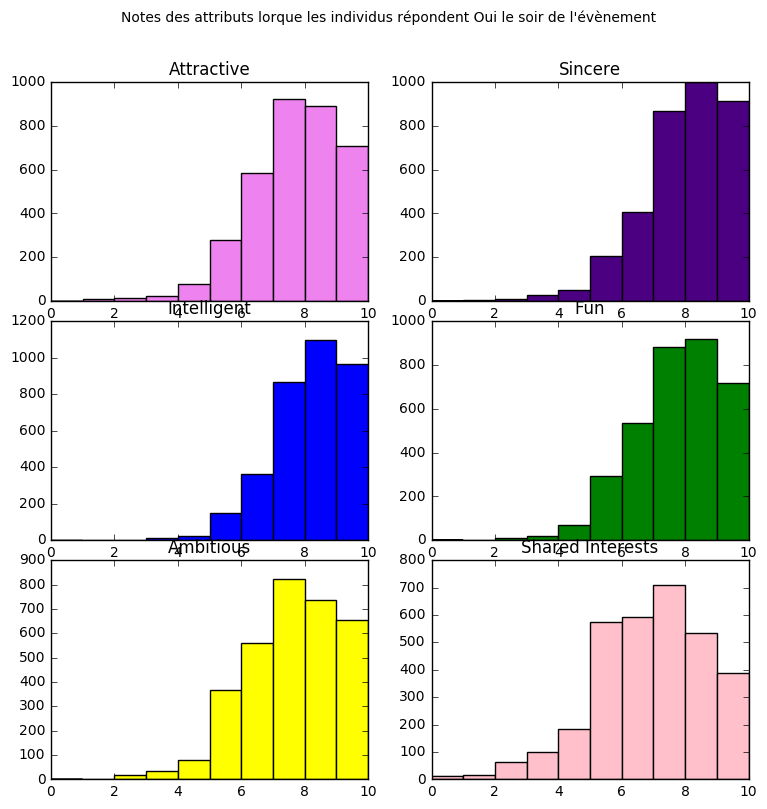

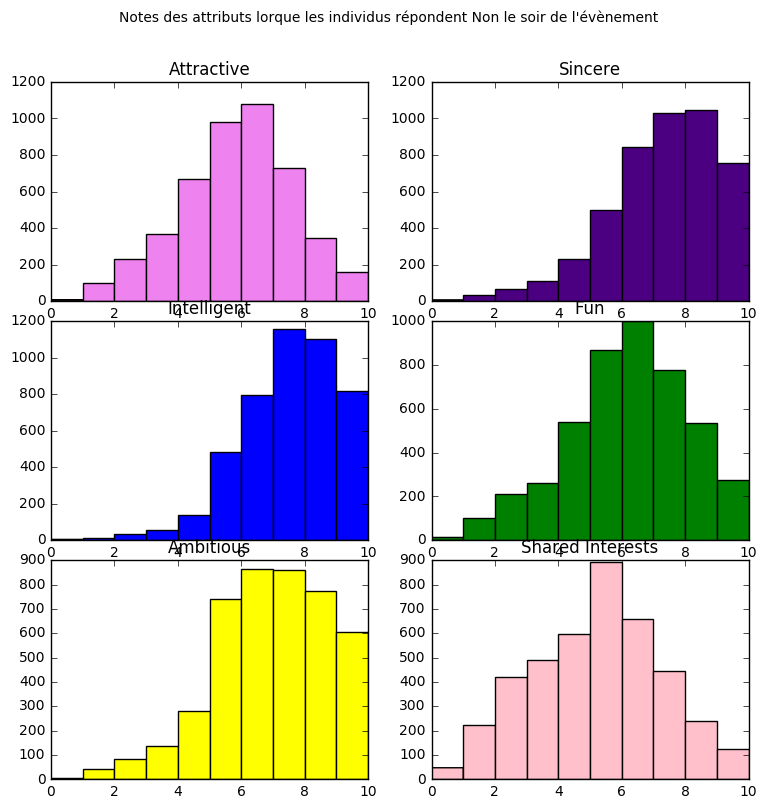

In [2]:
df = pd.read_csv("SpeedDatingData.csv", encoding="ISO-8859-1")
#print(df.head(50))

# Dans un premier temps, nous avons effectué quelques statistiques descriptives sur les données afin de mieux comprendre certains comportements.

dfyes= df.loc[df.dec == 1, :]
# Nous avons sélectionné les personnes qui ont accepté de revoir leurs partenaires le soir du rendez-vous 
# et avons regardé comment ils ont noté les attributs sélectionnés sur une échelle de 1 à 10.
plt.clf()
fig = plt.figure(figsize=(9,9))
plt.suptitle("Notes des attributs lorque les individus répondent Oui le soir de l'évènement")
ax1 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax2 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax3 = plt.subplot2grid((6,2), (2,0), rowspan=2, colspan=1)
ax4 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)
ax5 = plt.subplot2grid((6,2), (4,0), rowspan =2, colspan=1)
ax6 = plt.subplot2grid((6,2), (4,1), rowspan =2, colspan=2)


ax1.hist(dfyes['attr'].dropna(),color = 'violet', range=(0,10))
ax1.set_title("Attractive")


ax2.hist(dfyes['sinc'].dropna(), color = 'indigo',  range=(0,10))
ax2.set_title("Sincere")

ax3.hist(dfyes['intel'].dropna(),  color = 'blue',  range=(0,10))
ax3.set_title("Intelligent")


ax4.hist(dfyes['fun'].dropna(),  color = 'green',  range=(0,10))
ax4.set_title("Fun")

ax5.hist(dfyes['amb'].dropna(), color = 'yellow',  range=(0,10))
ax5.set_title("Ambitious")

ax6.hist(dfyes['shar'].dropna(), color = 'pink',  range=(0,10))
ax6.set_title("Shared Interests")


dfno= df.loc[df.dec == 0, :]
# Nous avons sélectionné les personnes qui n'ont pas voulu revoir leurs partenaires le soir du rendez-vous 
# et avons regardé comment ils ont noté les attributs sélectionnés sur une échelle de 1 à 10
fig = plt.figure(figsize=(9,9))
plt.suptitle("Notes des attributs lorque les individus répondent Non le soir de l'évènement")
ax1 = plt.subplot2grid((6,2), (0,0), rowspan =2, colspan=1)
ax2 = plt.subplot2grid((6,2), (0,1), rowspan =2, colspan=2)
ax3 = plt.subplot2grid((6,2), (2,0), rowspan =2, colspan=1)
ax4 = plt.subplot2grid((6,2), (2,1), rowspan =2, colspan=2)
ax5 = plt.subplot2grid((6,2), (4,0), rowspan =2, colspan=1)
ax6 = plt.subplot2grid((6,2), (4,1), rowspan =2, colspan=2)


ax1.hist(dfno['attr'].dropna(),color = 'violet', range=(0,10))
ax1.set_title("Attractive")


ax2.hist(dfno['sinc'].dropna(), color = 'indigo',  range=(0,10))
ax2.set_title("Sincere")

ax3.hist(dfno['intel'].dropna(),  color = 'blue',  range=(0,10))
ax3.set_title("Intelligent")


ax4.hist(dfno['fun'].dropna(),  color = 'green',  range=(0,10))
ax4.set_title("Fun")


ax5.hist(dfno['amb'].dropna(), color = 'yellow',  range=(0,10))
ax5.set_title("Ambitious")

ax6.hist(dfno['shar'].dropna(), color = 'pink',  range=(0,10))
ax6.set_title("Shared Interests")

plt.show()

**Résultats** : Intelligence, Ambition and Sincerity ont la même configuration dans les deux groupes, mais les attributs Attractivity, Fun and Shared Interests diffèrent. Il semble que les personnes prennent leurs décisions selon des caractéristiques qui sont plus "superficielles".

## II] Prédictions et limites du modèle


##### (i) Modifications dans la structure (paires)

Pour répondre à notre problématique, qui est celle de prédire un match entre deux personnes, nous avons transformé la base afin d'avoir sur chaque ligne des paires de personnes. **Cela constitue un élément clé de notre projet** : nous avons accès, sur une même ligne, aux variables caractérisant les deux personnes qui se sont rencontrées, ainsi qu'au résultat du match. Cela nous a permis d'utiliser les modèles présentés dans cette partie. 
En effet, si l'on avait utilisé les modèles de prédiction sur la base telle qu'elle, nous aurions eu une idée des éléments qui orientent le choix de revoir son partenaire ou non. Pour prédire le match, il nous faut un système de réciprocité, et donc les décisions des deux personnes qui se rencontrent ainsi que leurs données respectives.

Ainsi, nous cherchons à prédire un match le soir de l'évènement et les critères qui permettent de le prédire.

In [3]:
# Ci-dessous se trouvent les variables que l'ont veut considérer pour le modèle. Celles ci sont présentées dans l'introduction de ce projet.
variables = ['iid', 'gender', 'wave', 'pid', 'match', 'samerace', 'age_o', 'race_o',
                 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'sports',
                 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 
                 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1','sinc3_1',
                 'fun3_1', 'intel3_1', 'amb3_1','attr','sinc','intel','fun','amb', 'shar']
dfpred = df[variables]

dfmen = dfpred[dfpred['gender']==1]
dfwomen = dfpred[dfpred['gender']==0]

# Les variables que l'on considère pour les femmes sont:
variableswomen = ['iid','pid', 'match', 'samerace', 'age_o', 'race_o',
                 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'sports',
                 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 
                 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1','sinc3_1',
                 'fun3_1', 'intel3_1', 'amb3_1','attr','sinc','intel','fun','amb', 'shar']
new_dfwomen = dfwomen[variableswomen]
# Les variables que l'on considère pour les hommes sont (pour éviter de faire des répétitions dans chaque ligne):
variablesmen = [variableswomen[0]] +[variableswomen[1]]+variableswomen[4:]

new_dfmen = dfmen[variablesmen]
new_df = pd.DataFrame.copy(new_dfwomen)
new_dfmen.columns = [i+'_m' for i in variablesmen] # Les variables des hommes sont indicées par _m

# Nous commençons ici à construire le nouveau dataframe:
dfmodel = pd.DataFrame()
for i in new_dfwomen.index.values:
    women_data = new_dfwomen.loc[i,:]
    pid = new_dfwomen.loc[i,'pid'] # Ceci est l'iid du partenaire
    men_ind = new_dfmen.iid_m == pid # Nous regardons combien d'iid sont égaux à celui du partenaire
    if sum(men_ind) !=0: # Nous regardons si l'iid existe bien parmi les iid des hommes
        men_data_df = new_dfmen[men_ind]  # Nous collectons toutes les informations (les lignes) concernant le partenaire
        men_data = men_data_df.loc[men_data_df.loc[men_data_df.pid_m==women_data.iid].index[0],:] # Nous gardons simplement la ligne où l'homme rencontre la femme considérée  
        both = women_data.append(men_data) # Nous rassemblons toutes les variables en une seule ligne
        dfmodel = dfmodel.append(both,ignore_index=True)
# On se débarasse des colonnes dont nous n'avons pas besoin pour la régression
notused = ['iid', 'pid','pid_m','iid_m']
print("Regroupement des données en paires effectué")
df_pair = dfmodel.drop(notused,axis=1)

#print(df_pair.loc[df_pair['match']==1]) 

Regroupement des données en paires effectué


##### (ii) Régression logistique

Nous effectuons dans un premier temps une régression logistique puisque nous avons en variable expliquée une variable binaire.

             precision    recall  f1-score   support

        0.0       0.87      0.96      0.91       879
        1.0       0.55      0.28      0.37       167

avg / total       0.82      0.85      0.83      1046

0.864244741874
Area under the ROC curve for the Logistic Regression model : 0.800072


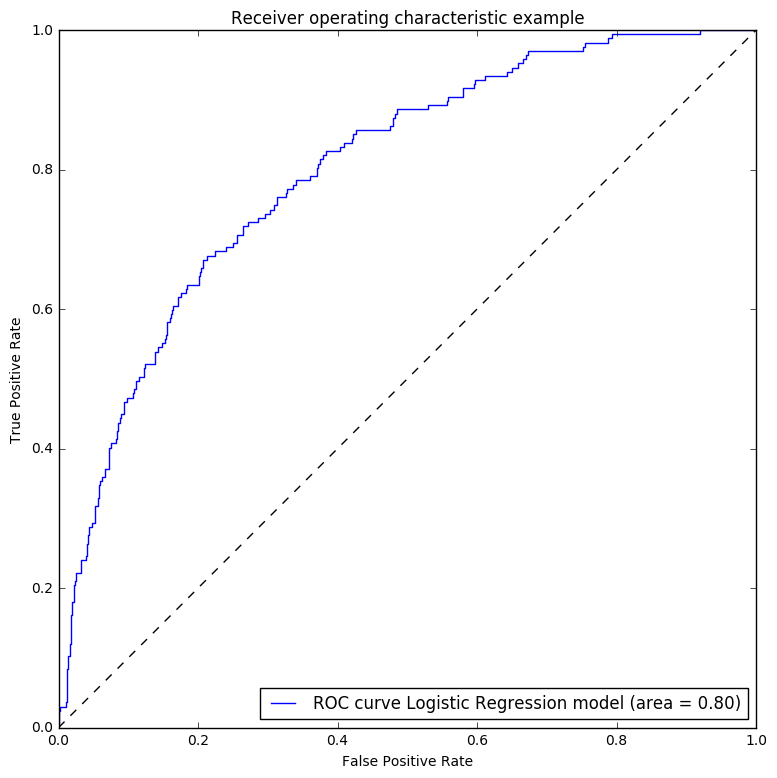

In [4]:
df_pair_lin=df_pair.fillna(value=0) # On enlève les valeurs NaN pour faire la régression logistique, on les remplace par 0 

# Modèle de prédiction sur les paires de personnes dont la variable expliquée est le match ou non (variable match)
# Il faut transformer le dataframe df_pair en array pour travailler sur scikit learn

Y=df_pair_lin['match']
df_pair_lin=df_pair_lin.drop(['match'],axis=1)
X=df_pair_lin
X_array= X.as_matrix()
Y_array = Y.as_matrix()

X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array)
clf = LogisticRegression()
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test) 
expected = Y_test
print(metrics.classification_report(expected, predicted)) 
# precision : le nombre de résultats corrects de la catégorie divisé par le nombre de résultats retournés dans 
# la catégorie ou la capacité du classifier à ne pas catégoriser un 0 en un 1
# recall : le nombre de résultats corrects de la catégorie divisés par le nombre d'éléments qui devraient être dans 
# la catégorie ou la capacité du classifier à trouver les éléments de la catégorie

print(clf.score(X_train, Y_train)) # R^2 du modèle de prédiction
probas = clf.predict_proba(X_test)
# probas est une matrice de deux colonnes avec les probabilités d'appartenance à chaque classe
fig = plt.figure(figsize=(9,9))
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

print ("Area under the ROC curve for the Logistic Regression model : %f" % roc_auc)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve Logistic Regression model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Résultats** : Les résultats sont bons mais le modèle prédit beaucoup de 0 qui devraient être des 1 et nous avons du mal à trouver les matchs, alors que nous identifions très bien les non matchs (cf "recall").
Cela est dû au fait que l'on ait un "imbalanced dataset", qui contient seulement 10% de matchs (cf conclusion partie II).

##### (iii) Arbre de décision

Contrairement à la régression logistique, un arbre de décision est un outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre. Les différentes décisions possibles sont situées aux extrémités des branches (les « feuilles » de l'arbre), et sont atteints en fonction de décisions prises à chaque étape. 
Ce modèle est implémenté ci-dessous :

max_depth 6 erreur 0.333492632426 0.407857808987
0.888782664117
Area under the ROC curve for the DecisionTreeClassifier model : 0.762745


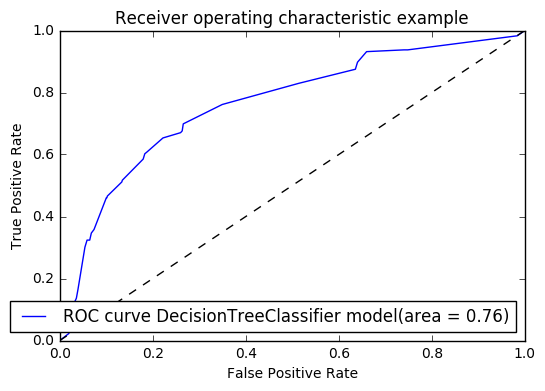

In [6]:
df_pair_arb=df_pair.fillna(value=0) # J'ai enlevé df_pair_bal
Y=df_pair_arb['match']
df_pair_arb=df_pair_arb.drop(['match'],axis=1)
X=df_pair_arb
X_array= X.as_matrix()
Y_array = Y.as_matrix()
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array)

depth=6
clf1 = DecisionTreeClassifier(max_depth=depth)
clf1 = clf1.fit(X_train, Y_train)
clf1.score(X_train, Y_train)
errtrain = mean_squared_error(clf1.predict(X_train), Y_train)**0.5
errtest = mean_squared_error(clf1.predict(X_test), Y_test)**0.5
print("max_depth",depth, "erreur",errtrain,errtest)
print(clf1.score(X_train, Y_train)) # R^2 du modèle de prédiction


probas1 = clf1.predict_proba(X_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_test, probas1[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print ("Area under the ROC curve for the DecisionTreeClassifier model : %f" % roc_auc1)
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve DecisionTreeClassifier model(area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Résultats** : Nous obtenons, avec le modèle d'arbre de décision, des résultats très corrects : Le R2 et l'aire sous la courbe ROC sont élevés. Nous verrons une fois de plus que nous pouvons améliorer ce modèle en considérant une base de données moins déséquilibrée (cf partie III).

##### (iv) Gradient bootsting


En ce qui concerne ce modèle, l’idée principale est d’agréger plusieurs classifieurs ensembles mais en les créant itérativement. Ces « mini-classifieurs » sont généralement des fonctions simples et paramétrées dont chaque paramètre est le critère de split des branches. Le super-classifieur final est une pondération  de ces mini-classifieurs. Le classifieur du gradient boosting est donc au final paramétré par les poids de pondération des différents mini-classifieurs, ainsi que par les paramètres des fonctions utilisées. Il s’agit donc d’explorer un espace de fonctions simples par une descente de gradient sur l’erreur.

Le caractère "boosting" veut dire que Les différents classifieurs sont pondérés de manière à ce qu’à chaque prédiction, les classifieurs ayant prédit correctement auront un poids plus fort que ceux dont la prédiction est incorrecte.

Nous utilisons le modèle "boosting" car la base est imbalanced. Une méthode plus classique aurait tendance à beaucoup plus considérer les non matchs.

In [7]:
# Nous effectuons ici un modèle de Gradient Boosting Regressor.

df_pair_grad=df_pair.fillna(value=0) 
Y=df_pair_grad['match']
del df_pair_grad['match']
X=df_pair_grad
X_array= X.as_matrix()
Y_array = Y.as_matrix()
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array)


params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf2 = ensemble.GradientBoostingRegressor(**params)


clf2.fit(X_train, Y_train)
acc = clf2.score(X_test, Y_test)
print("Accuracy: {:.4f}".format(acc))
mse = mean_squared_error(Y_test, clf2.predict(X_test))
print("MSE: %.4f" % mse)



Accuracy: 0.2502
MSE: 0.1016


** Résultats** : Le Mean Squared Error est faible (0.1), ce qui est très positif. Mais la précision est trop faible pour que nous puissions retenir ce modèle dans cette première partie.

A ce stade de l'étude, nous nous sommes rendus compte d'un caractère très important de la base : le nombre de matchs correspondant au 1 de la variable *match* est très faible lorsque nous le comparons aux non match : 690 matchs sur 4184 paires de personnes.
Cela explique les résultats modérés que nous avons obtenus dans cette partie, que ce soit pour la régression logistique, l'arbre de décision ou la méthode de gradient boosting.

# III] Prise en compte du caractère imbalanced

Nous avons alors modifié la base en supprimant des lignes où les personnes n'avaient pas matché. Vous trouverez ci-dessous les mêmes modèles, appliqués à cette nouvelle base qui est alors "balanced". Comme vous allez le constater, les résultats sont bien meilleurs (comme nous pouvions nous y attendre !)

##### (i) Rééquilibrage de la base de données

In [8]:
# Nous rééquilibrons donc la base de données :

df_pair_bal=df_pair.loc[df_pair['match']==0]
df_pair_bal= df_pair_bal.loc[df_pair_bal.index < 700] # 585 paires de non matchs
df_pair_matchs=df_pair.loc[df_pair['match']==1]
df_pair_bal = df_pair_bal.append(df_pair_matchs,ignore_index=True)  # 1275 lignes

##### (ii) Reprise de la régression logistique sur la base rééquilibrée

             precision    recall  f1-score   support

        0.0       0.84      0.78      0.81       152
        1.0       0.81      0.87      0.84       167

avg / total       0.83      0.83      0.83       319

0.870292887029
Area under the ROC curve for the Logistic Regression model : 0.895840


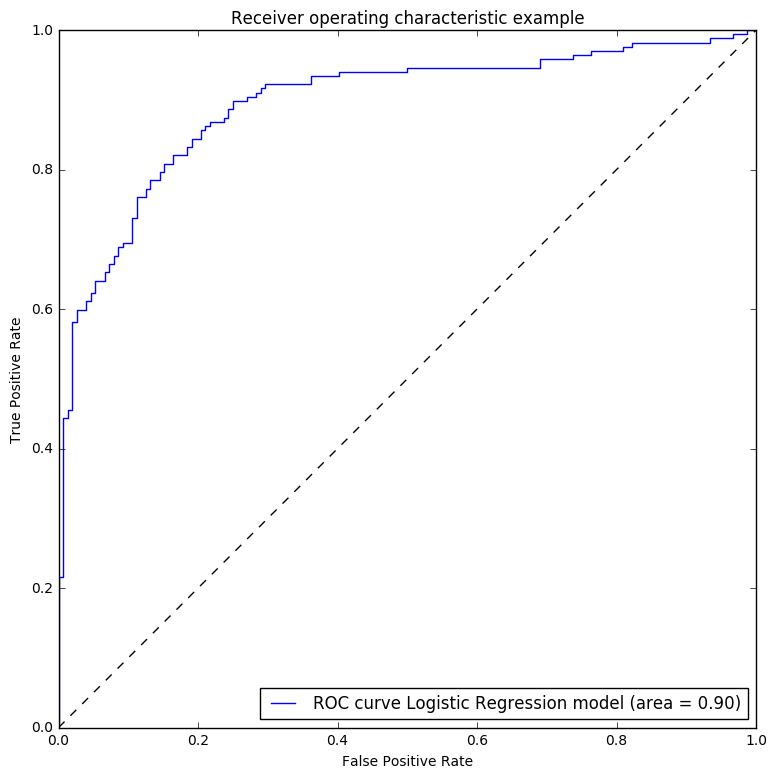

In [9]:

# Nous effectuons ici la régression logistique sur la base rééquilibrée.

df_pair_lin=df_pair_bal.fillna(value=0) 
Y=df_pair_lin['match']
df_pair_lin=df_pair_lin.drop(['match'],axis=1)
X=df_pair_lin
X_array= X.as_matrix()
Y_array = Y.as_matrix()
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array)
clf = LogisticRegression()
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test) 
expected = Y_test
print(metrics.classification_report(expected, predicted)) 
print(clf.score(X_train, Y_train)) # R^2 du modèle de prédiction
probas = clf.predict_proba(X_test)
fig = plt.figure(figsize=(9,9))
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve for the Logistic Regression model : %f" % roc_auc)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve Logistic Regression model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


** Résultats ** : Le modèle donne de bons résultats et surtout il semble bien prédire les matchs ! A titre de comparaison, nous avions obtenu dans la partie précédente un recall beaucoup plus faible pour les matchs. Cette fois-ci, celui-ci monte aux alentours de 0,85.



##### (iii) Reprise de l'arbre de décision sur la base rééquilibrée

In [10]:
# Nous effectuons ici un modèle d'Arbre de décision sur la base rééquilibrée.

df_pair_arb=df_pair_bal.fillna(value=0) 
Y=df_pair_arb['match']
df_pair_arb=df_pair_arb.drop(['match'],axis=1)
X=df_pair_arb
X_array= X.as_matrix()
Y_array = Y.as_matrix()
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array)

depth=6
clf1 = DecisionTreeClassifier(max_depth=depth)
clf1 = clf1.fit(X_train, Y_train)
clf1.score(X_train, Y_train)
errtrain = mean_squared_error( clf1.predict(X_train), Y_train)**0.5
errtest = mean_squared_error( clf1.predict(X_test), Y_test)**0.5
print("max_depth",depth, "erreur",errtrain,errtest)
print(clf1.score(X_train, Y_train)) # R^2 du modèle de prédiction


probas1 = clf1.predict_proba(X_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_test, probas1[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print ("Area under the ROC curve for the DecisionTreeClassifier model : %f" % roc_auc1)
plt.clf()
plt.plot(fpr1, tpr1, label='ROC curve DecisionTreeClassifier model(area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

max_depth 6 erreur 0.283802630457 0.491303684441
0.919456066946
Area under the ROC curve for the DecisionTreeClassifier model : 0.779206


** Résultats ** : Cette fois-ci les résultats ne varient que très peu. Comme nous pouvions nous y attendre de part le mode de fonctionnement même de ces méthodes, la différence est moins "visible" que la régression logistique.

##### (iv) Reprise du gradient bootsting sur la base rééquilibrée

In [11]:
# Nous effectuons ici un modèle de Gradient Boosting Regressor sur la base rééquilibrée.

df_pair_grad=df_pair_bal.fillna(value=0) 
Y=df_pair_grad['match']
del df_pair_grad['match']
X=df_pair_grad
X_array= X.as_matrix()
Y_array = Y.as_matrix()
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array)


params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf2 = ensemble.GradientBoostingRegressor(**params)

clf2.fit(X_train, Y_train)

acc = clf2.score(X_test, Y_test)
print("Accuracy: {:.4f}".format(acc))

mse = mean_squared_error(Y_test, clf2.predict(X_test))
print("MSE: %.4f" % mse)

Accuracy: 0.6493
MSE: 0.0872


** Résultats ** : Le MSE est toujours très faible, et la précision est bien plus importante que lorsque la base était "imbalanced".

##### (v) Importances des variables du modèle

D'après les résultats de la partie précédente, et dans le but de ne pas surcharger ce notebook, nous avons décidé de retenir le modèle de régression logistique pour étudier l'importance des variables dans le match. Ce choix est justifié par les bons résultats obtenus, aussi bien pour la prédiction de matchs que des non matchs, que pour la valeur de l'aire de la courbe ROC.

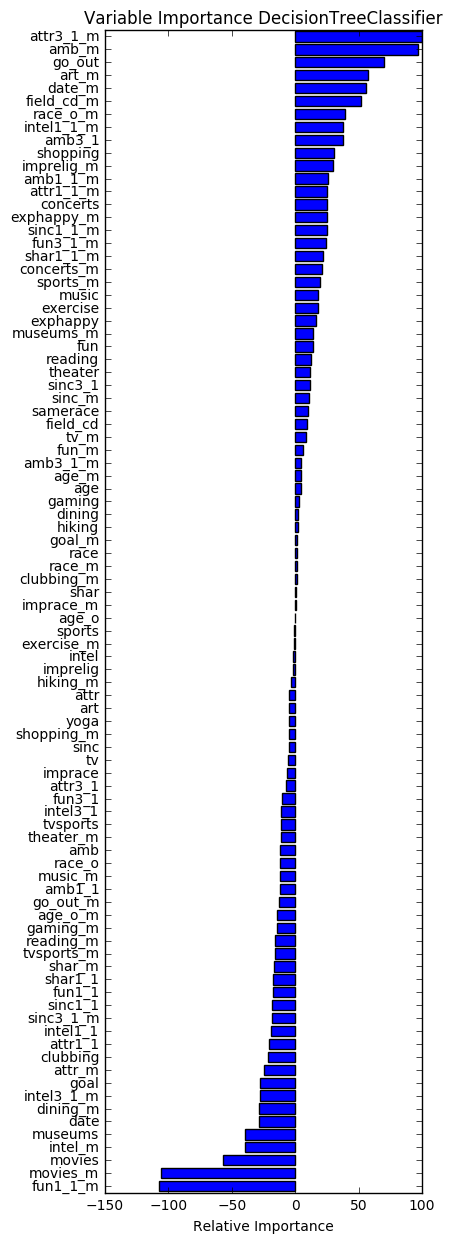

In [19]:
feature_importance = clf.coef_[0]
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance = np.delete(feature_importance, 0)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.clf()
fig = plt.figure(figsize=(9,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_pair_lin.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance DecisionTreeClassifier')
plt.show()


** Résultats ** : Ainsi, les variables comptant le plus dans la prise de décision sont :
- Le fait que l'Homme se trouve plus ou moins attrayant. Cela peut induire une certaine confiance qui peut se resentir au cours de l'entretien.
- Le fait que l'Homme ait trouvé sa partenaire ambitieuse après le premier entretien. Cela peut aller à l'encontre de ce que nous pouvons penser à priori : les Hommes ne se focalisent pas sur le physique pour prendre leur décision.
- En ce qui concerne la Femme, la fréquence de ses sorties (pas nécessairement pour faire des rencontres). Cela peut aussi être lié à une certaine aisance ou confiance au cours de l'entretien.
- Le fait que l'Homme soit intéressé par l'art.
- Enfin, la fréquence des rendez-vous de type "speed dating" joue aussi un rôle très important chez les Hommes.

Ici, nous **nous débarassons des cinq premières variables importantes dans la régression logistique afin de voir si elles jouent vraiment un rôle dans la prédiction**. Nous regardons si en les enlevant, la précision du modèle évolue négativement.

             precision    recall  f1-score   support

        0.0       0.75      0.82      0.79       139
        1.0       0.85      0.79      0.82       180

avg / total       0.81      0.81      0.81       319

0.873430962343
Area under the ROC curve for the Logistic Regression model : 0.880096


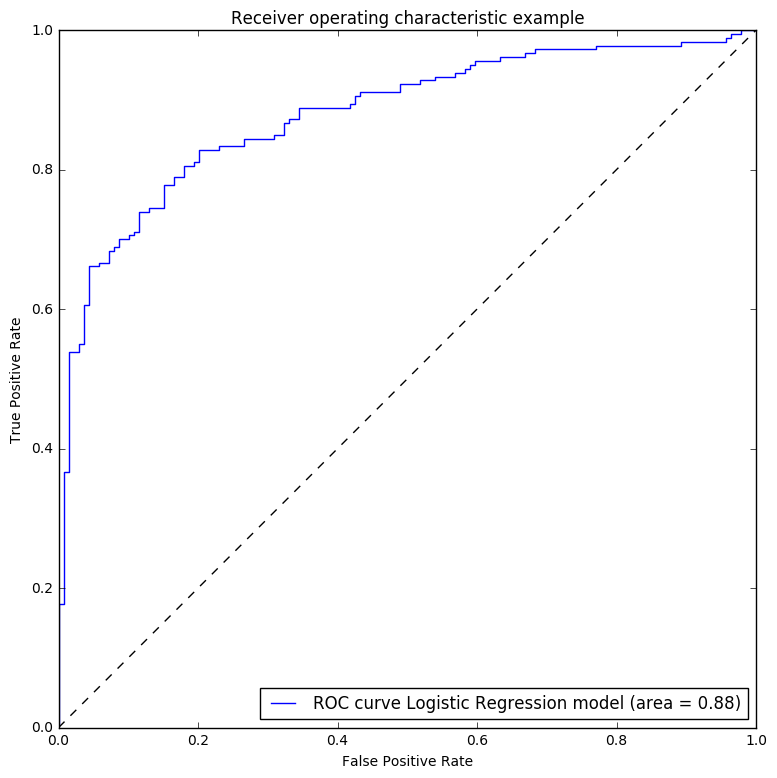

In [20]:
df_pair_bal2=df_pair_bal.drop(['amb_m','date_m','attr3_1_m', 'art_m', 'go_out'],axis=1)

# Nous effectuons de nouveau une régression logistique sur la base sans les variables
df_pair_bal2=df_pair_bal2.fillna(value=0)
Y=df_pair_bal2['match']
df_pair_bal2=df_pair_bal2.drop(['match'],axis=1)
X=df_pair_bal2
X_array= X.as_matrix()
Y_array = Y.as_matrix()
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array)
clfd = LogisticRegression()
clfd.fit(X_train, Y_train)
predicted = clfd.predict(X_test) 
expected = Y_test
print(metrics.classification_report(expected, predicted)) 
print(clfd.score(X_train, Y_train)) # R^2 du modèle de prédiction
probas = clfd.predict_proba(X_test)
fig = plt.figure(figsize=(9,9))
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve for the Logistic Regression model : %f" % roc_auc)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve Logistic Regression model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


** Résultats ** : la pertinence du modèle baisse (aussi bien pour le recall et pour la précision, que pour l'aire sous la courbe ROC...).
Ainsi, nous garderons l'ensemble des variables explicitées au début de ce projet pour mener à bien la dernière partie : la prédiction d'un match.

# IV] Prédiction particulière d'un match

##### (i) Vecteurs

Ci-dessous, vous trouverez le vecteur correspondant aux attributs et aux notes que nous nous sommes attribués afin de tester le match dans le cadre de ce projet.

In [2]:
variablesJA = [[22,22,22,22,10,9,10,10,9,9,4,7,9,10,8,8,9,7,7,4,8,7,4,5,10
              ,10,2,1,10,9,8,8,9,10,9,10,7,8,2,1,2,2,2,1,1,1,7,5,8,1,10,10,7,
              8,8,9,8,8,7,8,8,2,2,2,2,5,9,1,9,9,9,9,10,8,10,10,
              9,9,10,9,6,3,1,9,8,5,8,3,2,1,1]]

##### (ii) Test du match

Nous prédisons alors si oui ou non nous devrions matcher, en utilisant successivement les trois modèles :

In [1]:
# Régression logistique
print(clf.predict(variablesJA))

# Arbre de décision
print(clf1.predict(variablesJA))

# Gradient boosting
print(clf2.predict(variablesJA))

NameError: name 'clf' is not defined

**C'est le match !** En effet, les trois modèles prédisent le match lorsqu'ils traitent le vecteur regroupant nos attributs respectifs.

# Conclusion

Ce projet nous a tout d'abord permis de nous confronter à une base de données qui n'est pas simple de part sa structure. Nous avons ainsi pu comprendre à quel point il est important de comprendre la base de travail avant de se lancer dans l'application de divers modèles. De plus, nous avons du appréhender le fonctionnement de modèles classiques (régression logistique, arbre de décision, gradient boosting) en lien avec le type de données que nous possédions, et le type de caractéristiques que nous souhaitions prédire. Ce n'est qu'au bout de quelques semaines que nous nous sommes rendus compte du caractère "imbalanced", et que nous avons ainsi pu reconsidérer une nouvelle base équilibrée et comparer les améliorations dans les modèles.